In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Предварительная обработка данных

In [3]:
input_file = "Данные_по_транзакционной_активности_клиентов.csv"

df = pd.read_csv(input_file) 
original_headers = list(df.columns.values) #labels
original_datas = df
original_headers

['client_id',
 'gender',
 'birth_date',
 'create_date',
 'nonresident_flag',
 'businessman_flag',
 'city',
 'term',
 'contract_sum',
 'product_category_name',
 'card_id',
 'card_type_name',
 'start_date',
 'fact_close_date',
 'purchase_sum',
 'purchase_count',
 'current_balance_avg_sum',
 'current_balance_sum',
 'current_debit_turn_sum',
 'current_credit_turn_sum',
 'card_type']

In [4]:
original_datas.shape

(371583, 21)

## Оценка feauture importance для типа кредитной карты

In [6]:
original_datas = np.nan_to_num(original_datas) 
 
target_x = list(original_headers).index('card_type') 
target_y = original_datas.transpose()[target_x] 
target_y

array(['dc', 'dc', 'dc', ..., 'dc', 'dc', 'dc'], dtype=object)

In [7]:
for i in range(len(target_y)):
    if target_y[i] == 'dc':
        target_y[i] = 0.0
    else:
        target_y[i] = 1.0

Разделение датасета на тренировочный и тестовый в пропорции 70:30

In [9]:
df = df._get_numeric_data()
original_datas = df.to_numpy()
original_datas = np.nan_to_num(original_datas)

X = original_datas
y = target_y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

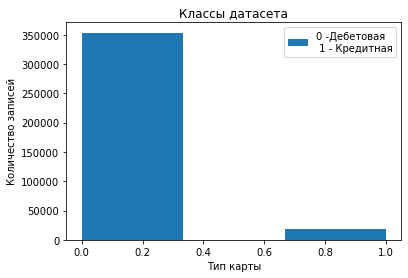

In [14]:
plt.hist(y, bins=3)
plt.title("Классы датасета")
plt.xlabel('Тип карты')
plt.ylabel('Количество записей')
plt.legend(['0 -Дебетовая \n 1 - Кредитная'])
plt.show()

Количество признаков в тренировочном и тестовом датасете

In [15]:
print(len(X_train))
print(len(X_test))

260108
111475


Инициализация регрессионной ML-модели RandomForestRegressor

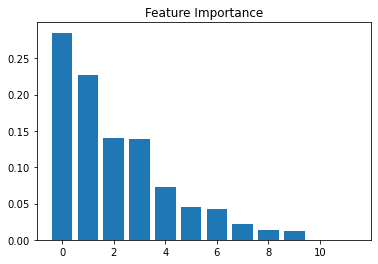

In [22]:
clf = RandomForestRegressor(random_state=0, n_jobs=-1)
model = clf.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.bar(range(X.shape[1]), importances[indices])
plt.title("Feature Importance")
plt.show()

Вывод наиболее важных признаков для обучения модели

In [18]:
names = [original_headers[i] for i in indices]
print(names)

['nonresident_flag', 'card_type_name', 'client_id', 'city', 'contract_sum', 'card_id', 'businessman_flag', 'create_date', 'product_category_name', 'term', 'birth_date', 'gender']
